#**Netflix Original Films & IMDB Scores - EDA**


This dataset consists of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials. The data was webscraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.

THE dataset available on [Kaggle.](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores)

Dataset consist of:


*   Title
*   Genre
*   Premiere date
*   Runtime 
*   IMDB scores
*   Languages



## This colab notebooks cover this question:

  [In which language were the long-running films created according to the dataset? Make a visualization.](#Question1)
  [Which genre has the highest IMDB rating among movies shot in English?](#Question2)
  [What is the average 'runtime' of movies shot in 'Hindi'?](#Question4)
  [How many categories does the Genre Column have and what are they? Visualize it.](#Question5)
  [Find the 3 most used languages in the movies in the data set.](#Question6)
  [Top 10 Movies With IMDB Ratings](#Question7)
  [What is the correlation between IMDB score and 'Runtime'? Examine and visualize.](#Question8)
  [Top 10 Genre by IMDB Score](#Question9)
  [What are the top 10 movies with the highest 'runtime'? Visualize it.](#Question10)
  [Which language movies have the lowest average IMDB rating? Visualize it.](#Question11)
  [What is the "Genre" where each language is used the most?](#Question12)
  [Is there any outlier data in the data set? Please explain.](#Question13)



In [83]:
#Import all the libraries that you might need.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
#Import the dataset to the dataframe
df_ntflx= pd.read_csv(r'C:\Users\Masthe\OneDrive\Desktop\SINAKO\PYTHON PROJECTS\MOVIE_RECOMMENDATION\NetflixOriginals.csv',encoding='ISO-8859-1')
df_ntflx

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [85]:
#Have a glance on how the dataset 
df_ntflx

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [86]:
#Have a description of the data
df_ntflx.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [87]:
#Have a look if there is any missing values
df_ntflx.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [90]:
#Drop all the data has full stops instead of commas

for count,k in enumerate(df_ntflx['Premiere']):
    if k=='.':
        df_dropped=df_ntflx.drop([count])
        

In [100]:
k=0
for count2,k in enumerate(df_dropped['Premiere']):
    if k=='.':
        df_dropped2=df_dropped.drop([count])
        

In [73]:
#Convert the string to time data type

#df_dropped['Premiere'].iloc[306]


'September 15. 2017'

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


<a name="Question1"></a>
###**1-In which language were the long-running films created according to the dataset? Make a visualization.**

In [6]:
df_temp= df_ntflx.groupby(['Title','Runtime','Language'])



In [7]:
df_temp= df_ntflx.sort_values(by='Runtime', ascending=False).reset_index().iloc[:,:3]

In [16]:
df_temp

,index,Title,Genre
0,561,The Irishman,Crime drama
1,328,Da 5 Bloods,War drama
2,581,Springsteen on Broadway,One-man show
3,247,Citation,Drama
4,284,The Forest of Love,Drama
...,...,...,...
579,498,Zion,Documentary
580,66,American Factory: A Conversation with the Obamas,Aftershow / Interview
581,325,Canvas,Animation / Short
582,417,Cops and Robbers,Animation / Short


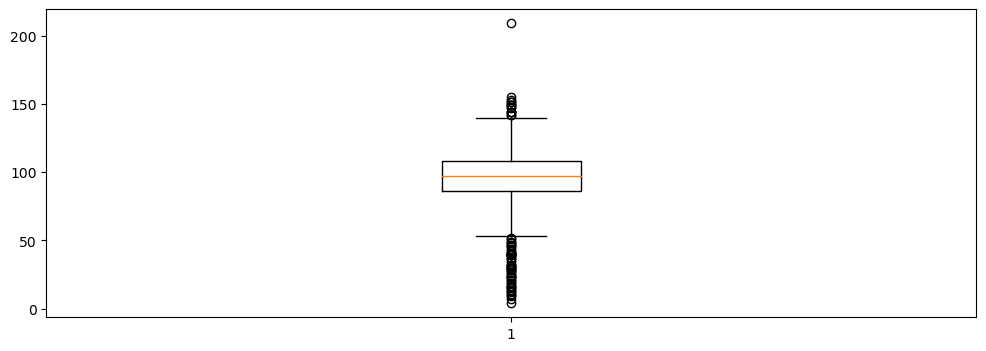

In [17]:
plt.figure(figsize=(12,4))
fig_1= plt.boxplot(data=df_ntflx,x='Runtime')

<a name="Question3"></a>
### **Which genre has the highest IMDB rating among movies shot in English?**

In [101]:
#df_genre= df_ntflx.groupby(['Language','Genre','Title']).mean('IMDB Score')
df_genre= df_ntflx[df_ntflx['Language']== "English"].groupby(['Language','Genre','Title']).mean('IMDB Score').sort_values(by='IMDB Score', ascending=False).head(10)
df_genre

Runtime  \
Language Genre                                Title                                                 
English  Documentary                          David Attenborough: A Life on Our Planet       83.0   
         One-man show                         Springsteen on Broadway                       153.0   
         Concert Film                         Ben Platt: Live from Radio City Music Hall     85.0   
                                              Taylor Swift: Reputation Stadium Tour         125.0   
         Documentary                          Cuba and the Cameraman                        114.0   
                                              Dancing with the Birds                         51.0   
                                              Seaspiracy                                     89.0   
         Animation/Christmas/Comedy/Adventure Klaus                                          97.0   
         Documentary                          Disclosure: Trans Lives on Screen             107.0   
                                              13th                                          100.0   

                                                                                          IMDB Score  
Language Genre                                Title                                                   
English  Documentary                          David Attenborough: A Life on Our Planet           9.0  
         One-man show                         Springsteen on Broadway                            8.5  
         Concert Film                         Ben Platt: Live from Radio City Music Hall         8.4  
                                              Taylor Swift: Reputation Stadium Tour              8.4  
         Documentary                          Cuba and the Cameraman                             8.3  
                                              Dancing with the Birds                             8.3  
                                              Seaspiracy                                         8.2  
         Animation/Christmas/Comedy/Adventure Klaus                                              8.2  
         Documentary                          Disclosure: Trans Lives on Screen                  8.2  
                                              13th                                               8.2

<a name="Question4"></a>
### **What is the average 'runtime' of movies shot in 'Hindi'?**

In [96]:
df_avg=df_ntflx[df_ntflx['Language']=='Hindi']

#df_avg

,Title,Genre,Premiere,Runtime,IMDB Score,Language
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi
16,Ghost Stories,Horror anthology,"January 1, 2020",144,4.3,Hindi
23,The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi
45,Mrs. Serial Killer,Thriller,"May 1, 2020",106,4.8,Hindi
87,Gunjan Saxena: The Kargil Girl,Drama,"August 12, 2020",112,5.3,Hindi
97,Dolly Kitty and Those Twinkling Stars,Drama,"September 18, 2020",120,5.4,Hindi
100,Guilty,Thriller,"March 6, 2020",119,5.4,Hindi
112,House Arrest,Comedy,"November 15, 2019",104,5.5,Hindi


In [23]:
df_avg['Runtime'].mean()

115.78787878787878

<a name="Question5"></a>
### **How many categories does the Genre Column have and what are they? Visualize it.**

In [102]:
df_genre= df_ntflx['Genre'].value_counts()

In [25]:
df_genre

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

<Axes: xlabel='Genre'>

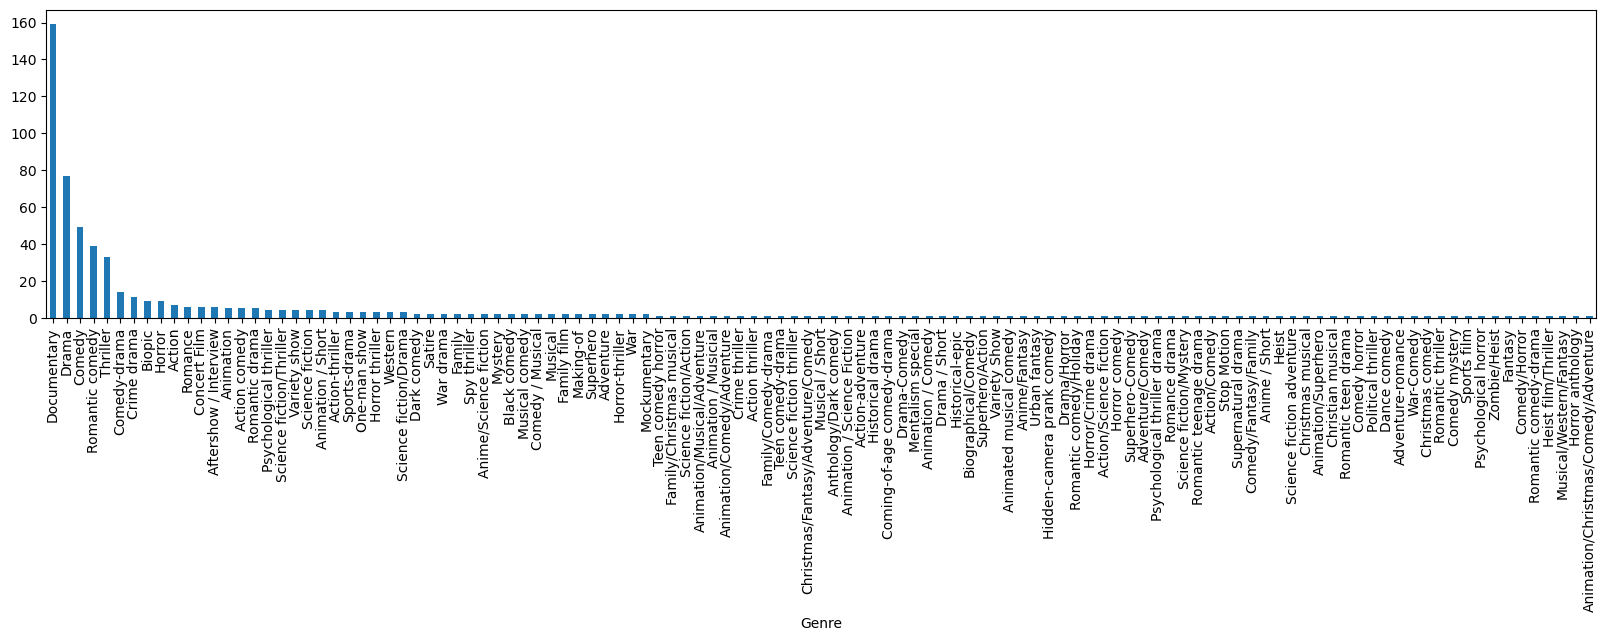

In [27]:
plt.figure(figsize=(20,4))

df_genre.plot.bar()

<a name="Question6"></a>
### **Find the 3 most used languages in the movies in the data set.**

In [28]:
df_lan=df_ntflx['Language'].value_counts().head(3)



In [29]:
df_lan

Language
English    401
Hindi       33
Spanish     31
Name: count, dtype: int64

<Axes: xlabel='Language'>

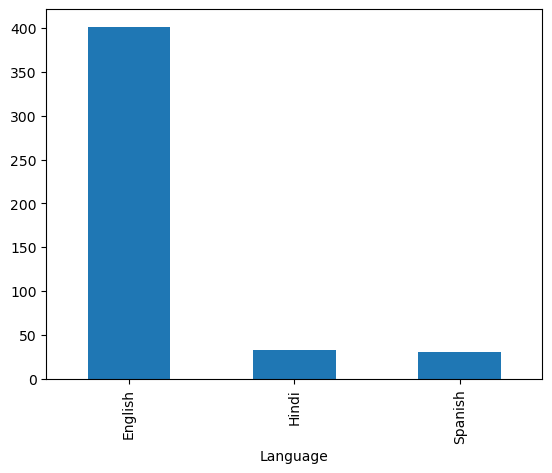

In [30]:
df_lan.plot.bar()

<a name="Question7"></a>
### **Top 10 Movies With IMDB Ratings**

In [31]:
df_ntflx

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [32]:
#df_topMov= df_ntflx.groupby(['Title','IMDB Score'])

In [103]:
df_topMov=df_ntflx.sort_values(by='IMDB Score',ascending=False).head(10)

<Axes: xlabel='Title', ylabel='IMDB Score'>

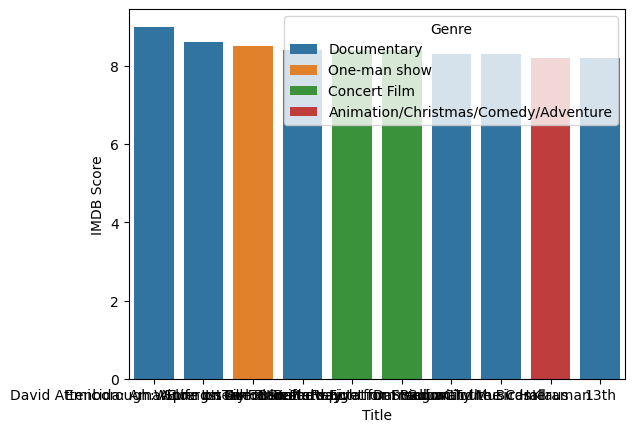

<Axes: xlabel='Title'>

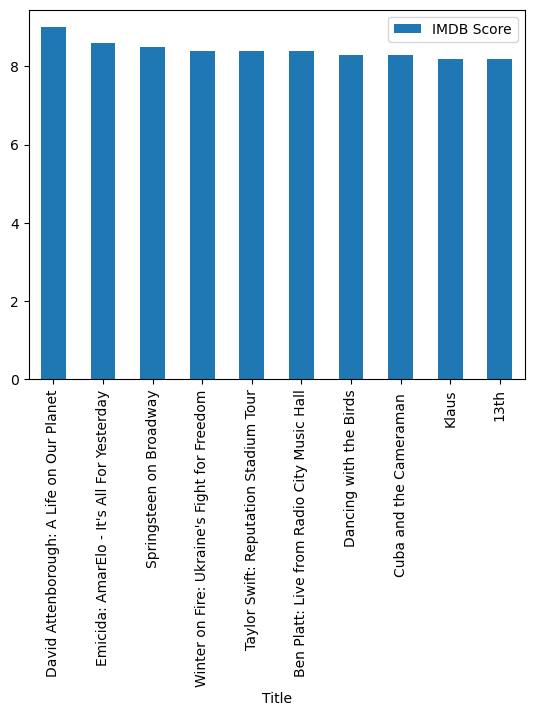

In [104]:
df_topMov.plot.bar(x='Title',y='IMDB Score')

<Axes: xlabel='Title', ylabel='IMDB Score'>

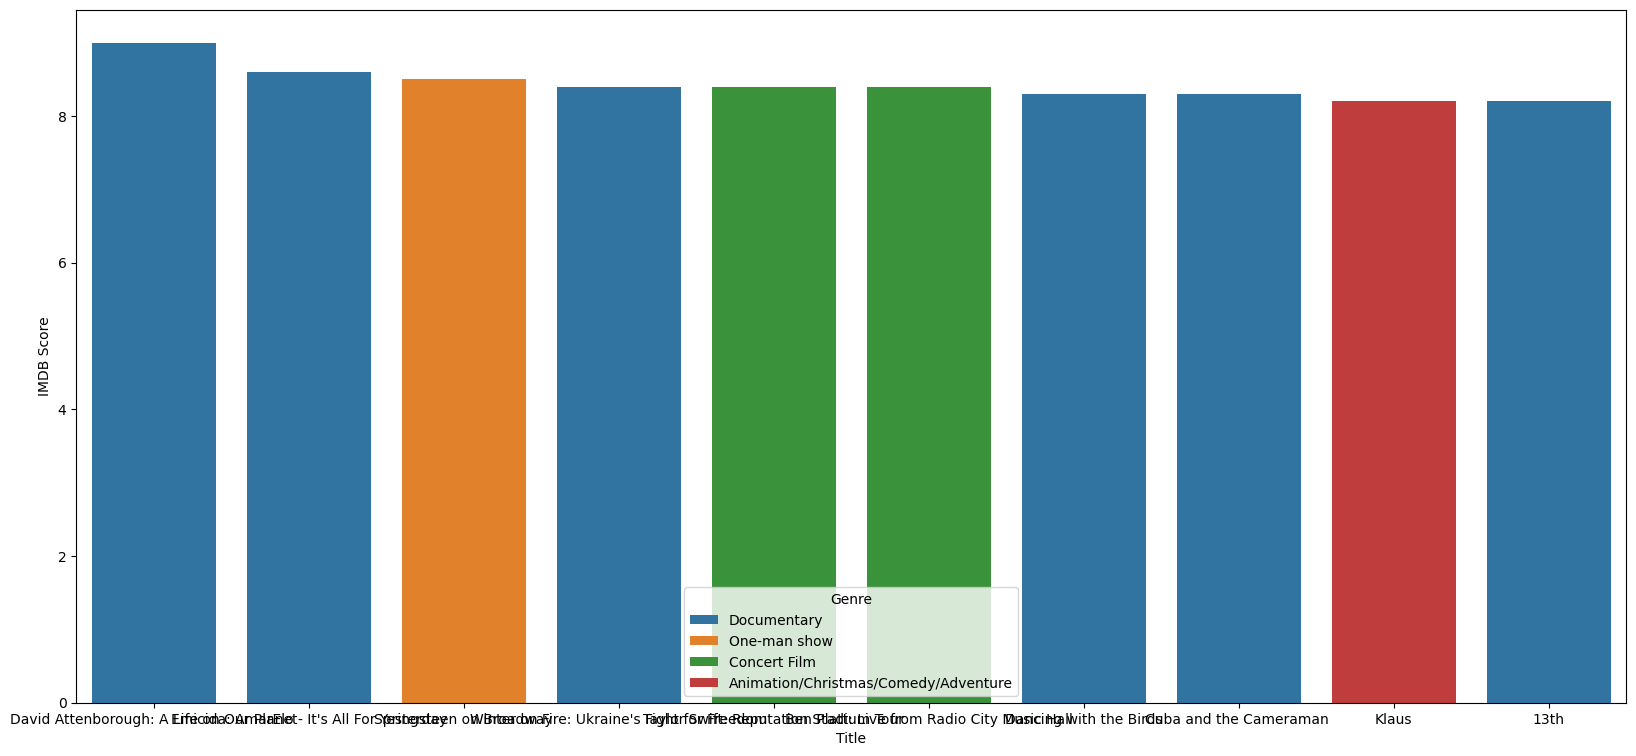

In [105]:
fig_2=plt.figure(figsize=(20,9))

sns.barplot(data=df_topMov, x='Title',y='IMDB Score',hue='Genre')


<a name="Question8"></a>
### **What is the correlation between IMDB score and 'Runtime'? Examine and visualize.**

In [106]:
df_corr=df_ntflx[['IMDB Score','Runtime']].corr()

df_corr

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


<Axes: xlabel='IMDB Score', ylabel='Runtime'>

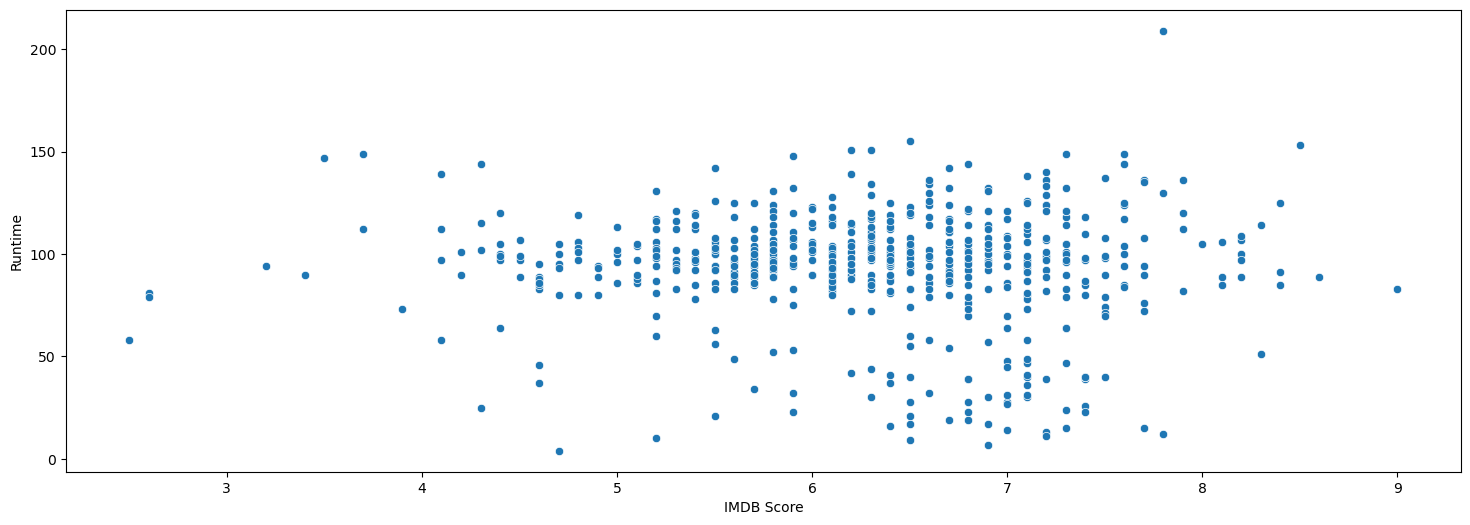

In [51]:
plt.figure(figsize=(18,6))

sns.scatterplot(data=df_ntflx,x='IMDB Score',y='Runtime')

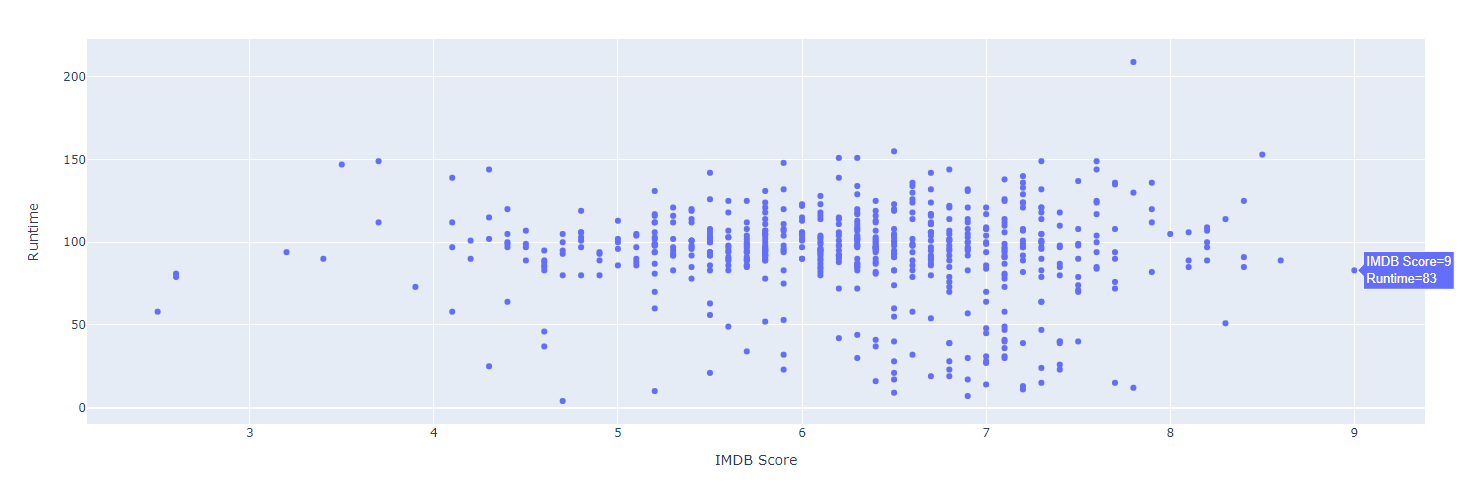

<a name="Question9"></a>
### **Top 10 Genre by IMDB Score**

In [116]:
df_ntflx.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [70]:
df_TopGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 583 to 571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       10 non-null     object 
 1   Genre       10 non-null     object 
 2   Premiere    10 non-null     object 
 3   Runtime     10 non-null     int64  
 4   IMDB Score  10 non-null     float64
 5   Language    10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 560.0+ bytes


C:\Users\Masthe\AppData\Local\Temp\ipykernel_19384\308572538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_TopGenre,x='Genre',y='IMDB Score',palette='viridis')


<Axes: xlabel='Genre', ylabel='IMDB Score'>

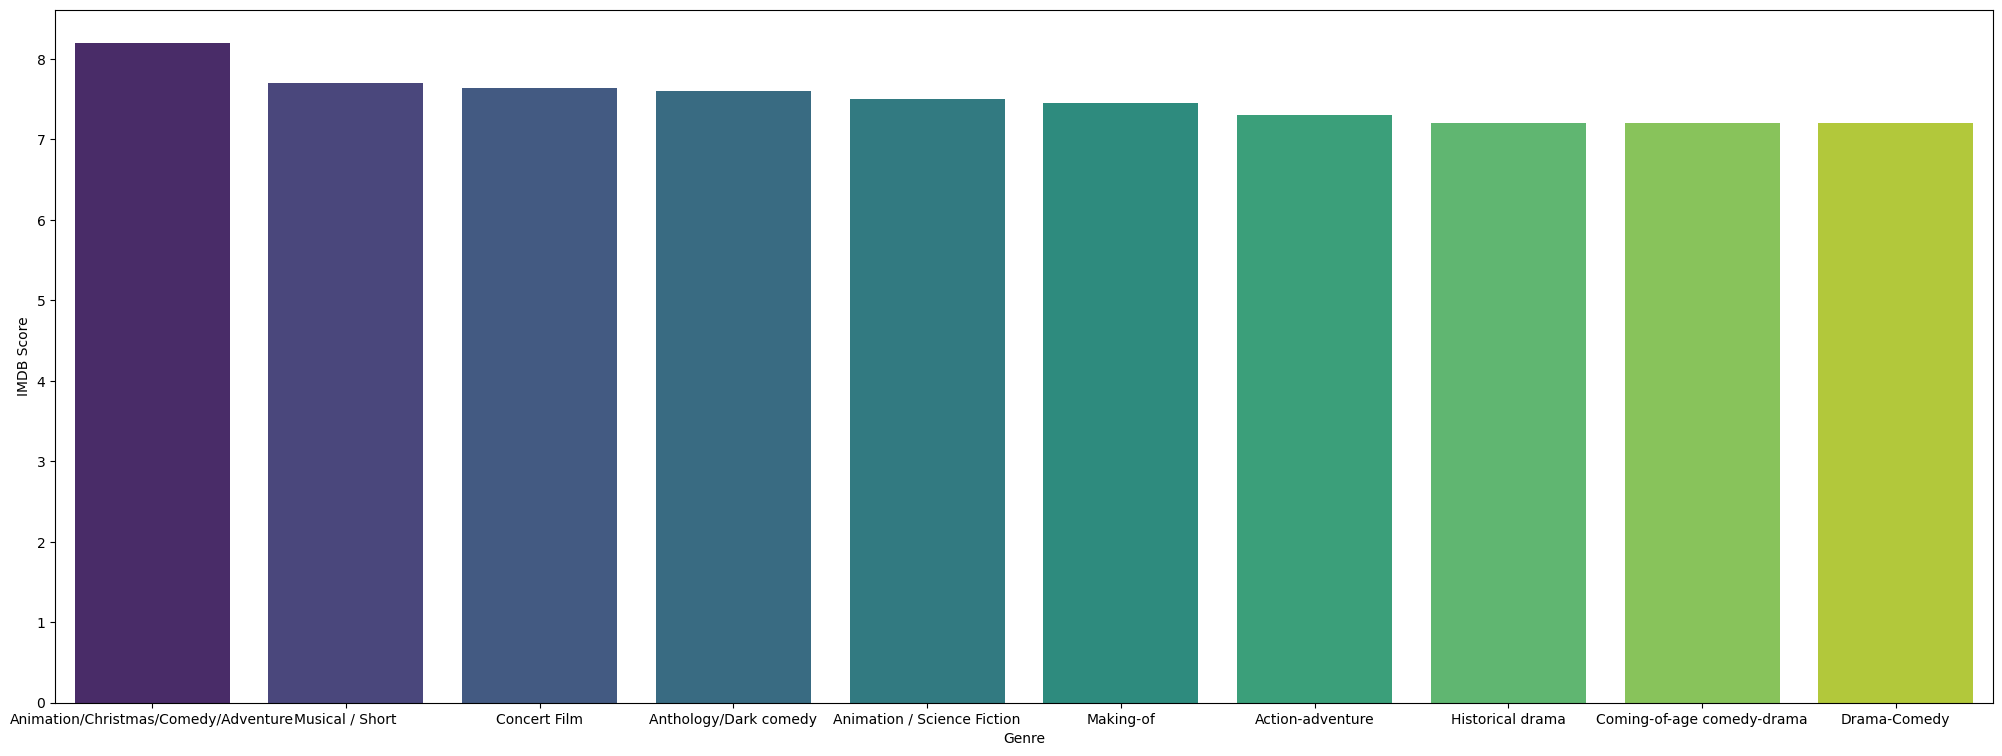

In [129]:
df_TopGenre= df_ntflx.groupby(['Genre']).mean(['IMDB Rating']).sort_values(by='IMDB Score', ascending=False).head(10)
#df_TopGenre= df_ntflx.sort_values(by='IMDB Score', ascending=False).head(10)
plt.figure(figsize=(25,9))
#df_TopGenre.plot.bar(x=df_TopGenre.Genre,y='IMDB Score')
sns.barplot(data=df_TopGenre,x='Genre',y='IMDB Score',palette='viridis')


<a name="Question10"></a>
### **What are the top 10 movies with the highest 'runtime'? Visualize it.**

In [138]:
df_TopRun=df_ntflx.sort_values(by='Runtime',ascending=False).head(10)

<Figure size 2000x900 with 0 Axes>

C:\Users\Masthe\AppData\Local\Temp\ipykernel_19384\212045752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_TopRun,x='Title',y='Runtime',palette='viridis')


<Axes: xlabel='Title', ylabel='Runtime'>

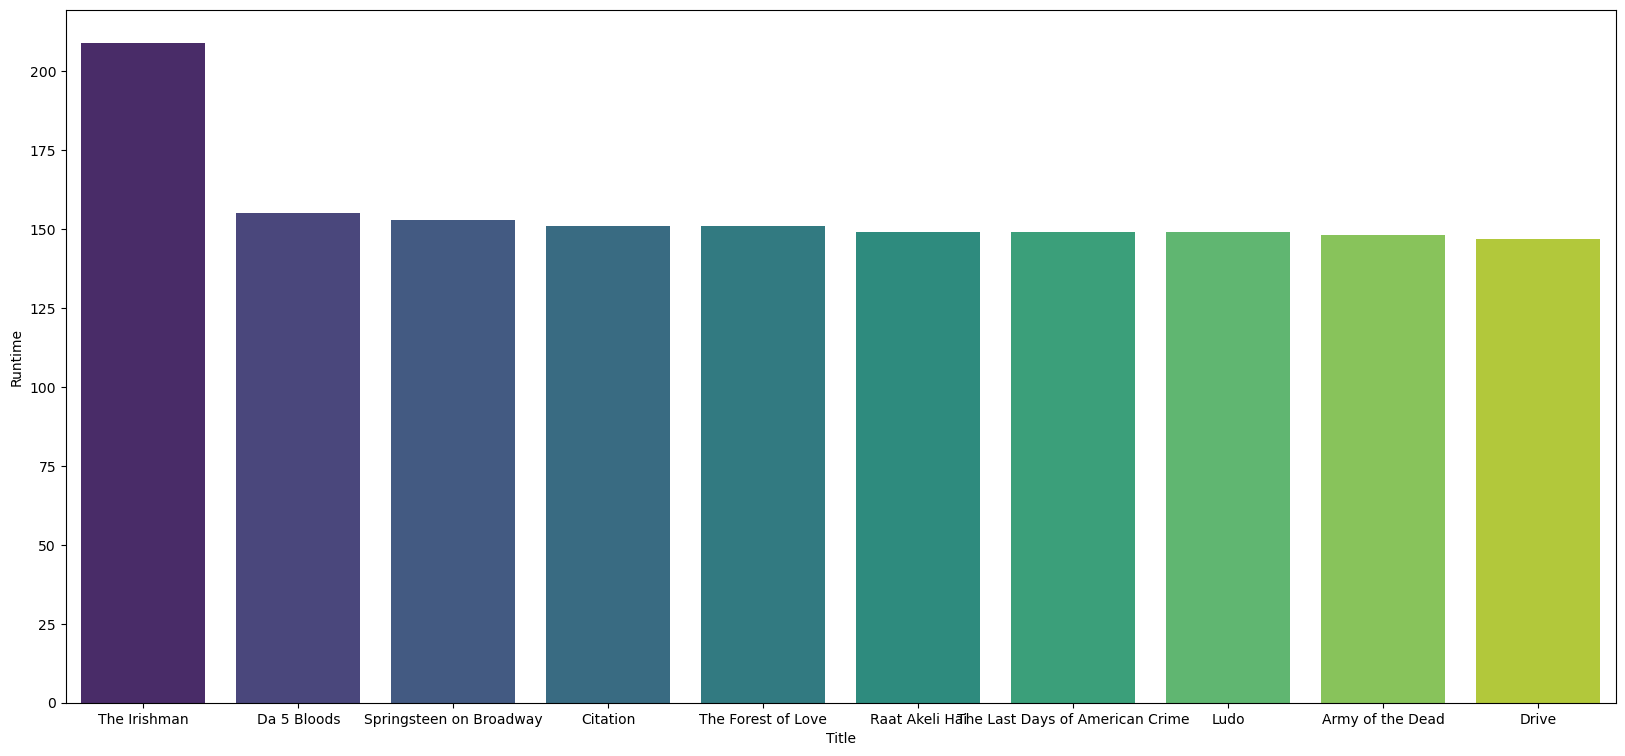

In [139]:
plt.figure(figsize=(20,9))

sns.barplot(data=df_TopRun,x='Title',y='Runtime',palette='viridis')

# <a name="Question12"></a>
### **11-Which language movies have the lowest average IMDB rating? Visualize it.**

<Axes: xlabel='Language', ylabel='IMDB Score'>

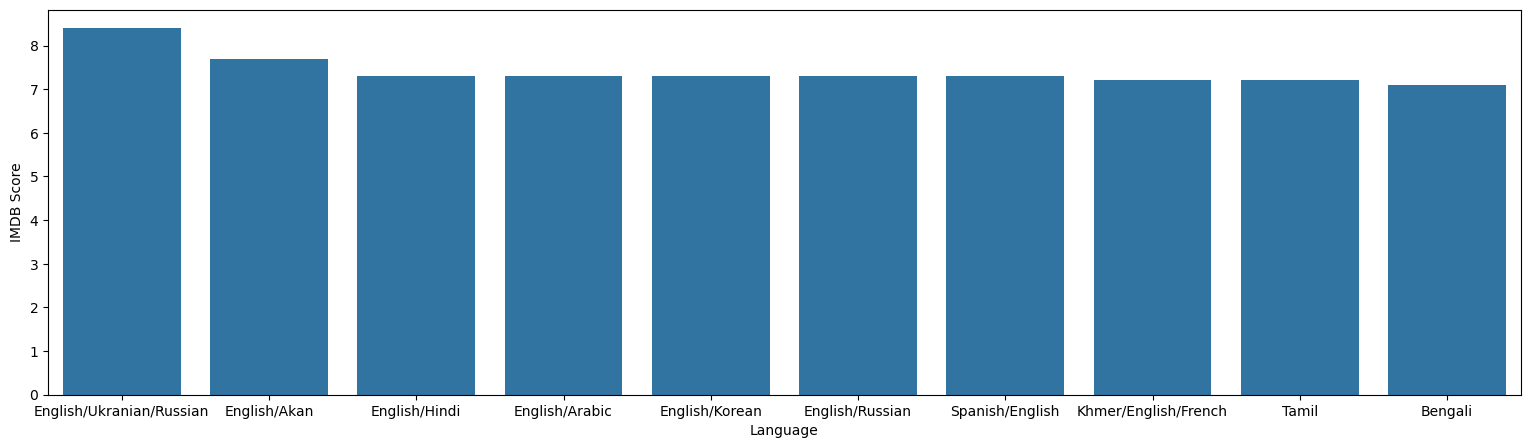

In [147]:
df_lowRate=df_ntflx.groupby(['Language']).mean('IMDB Rating').sort_values(by='IMDB Score', ascending=False).head(10)
plt.figure(figsize=(19,5))
sns.barplot(data=df_lowRate,x='Language',y='IMDB Score')

In [109]:
df_ntflx.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [114]:
df_lanG

[('English/Japanese',
  Genre
  Documentary    1
  Name: count, dtype: int64),
 ('Spanish',
  Genre
  Documentary    8
  Name: count, dtype: int64),
 ('Italian',
  Genre
  Drama    4
  Name: count, dtype: int64),
 ('English',
  Genre
  Documentary    120
  Name: count, dtype: int64),
 ('Hindi',
  Genre
  Drama    13
  Name: count, dtype: int64),
 ('Turkish',
  Genre
  Comedy    2
  Name: count, dtype: int64),
 ('Korean',
  Genre
  Drama    2
  Name: count, dtype: int64),
 ('Indonesian',
  Genre
  Drama    3
  Name: count, dtype: int64),
 ('Malay',
  Genre
  Action comedy    1
  Name: count, dtype: int64),
 ('Dutch',
  Genre
  Romantic comedy    1
  Name: count, dtype: int64),
 ('French',
  Genre
  Documentary    6
  Name: count, dtype: int64),
 ('English/Spanish',
  Genre
  Documentary    5
  Name: count, dtype: int64),
 ('Portuguese',
  Genre
  Comedy    6
  Name: count, dtype: int64),
 ('Filipino',
  Genre
  Drama    1
  Name: count, dtype: int64),
 ('German',
  Genre
  Thriller    1

<a name="Question14"></a>
### **What is the "Genre" where each language is used the most?**

In [122]:
df_lanG= []

for i in df_ntflx['Language'].unique():
    df_lang= df_ntflx[df_ntflx['Language']==i]
    df_Glan= df_lang['Genre'].value_counts().nlargest(1)
    df_lanG.append((i,df_Glan))
    

    

In [123]:
    #df_lang=pd.DataFrame(df_lanG, columns= ['Language', 'Genre'])
    
    #df_lang.sort_values(by='Language',ignore_index=True)

Genre
Documentary    1
Name: count, dtype: int64

<a name="Question15"></a>
### **Is there any outlier data in the data set? Please explain.**

Let's look the Runtime for detecting outlier. We can easily see one outlier with no doubt. The outlier of Runtime column' is "The Irishman"

<Axes: xlabel='Runtime', ylabel='Title'>

C:\Users\Masthe\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
C:\Users\Masthe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


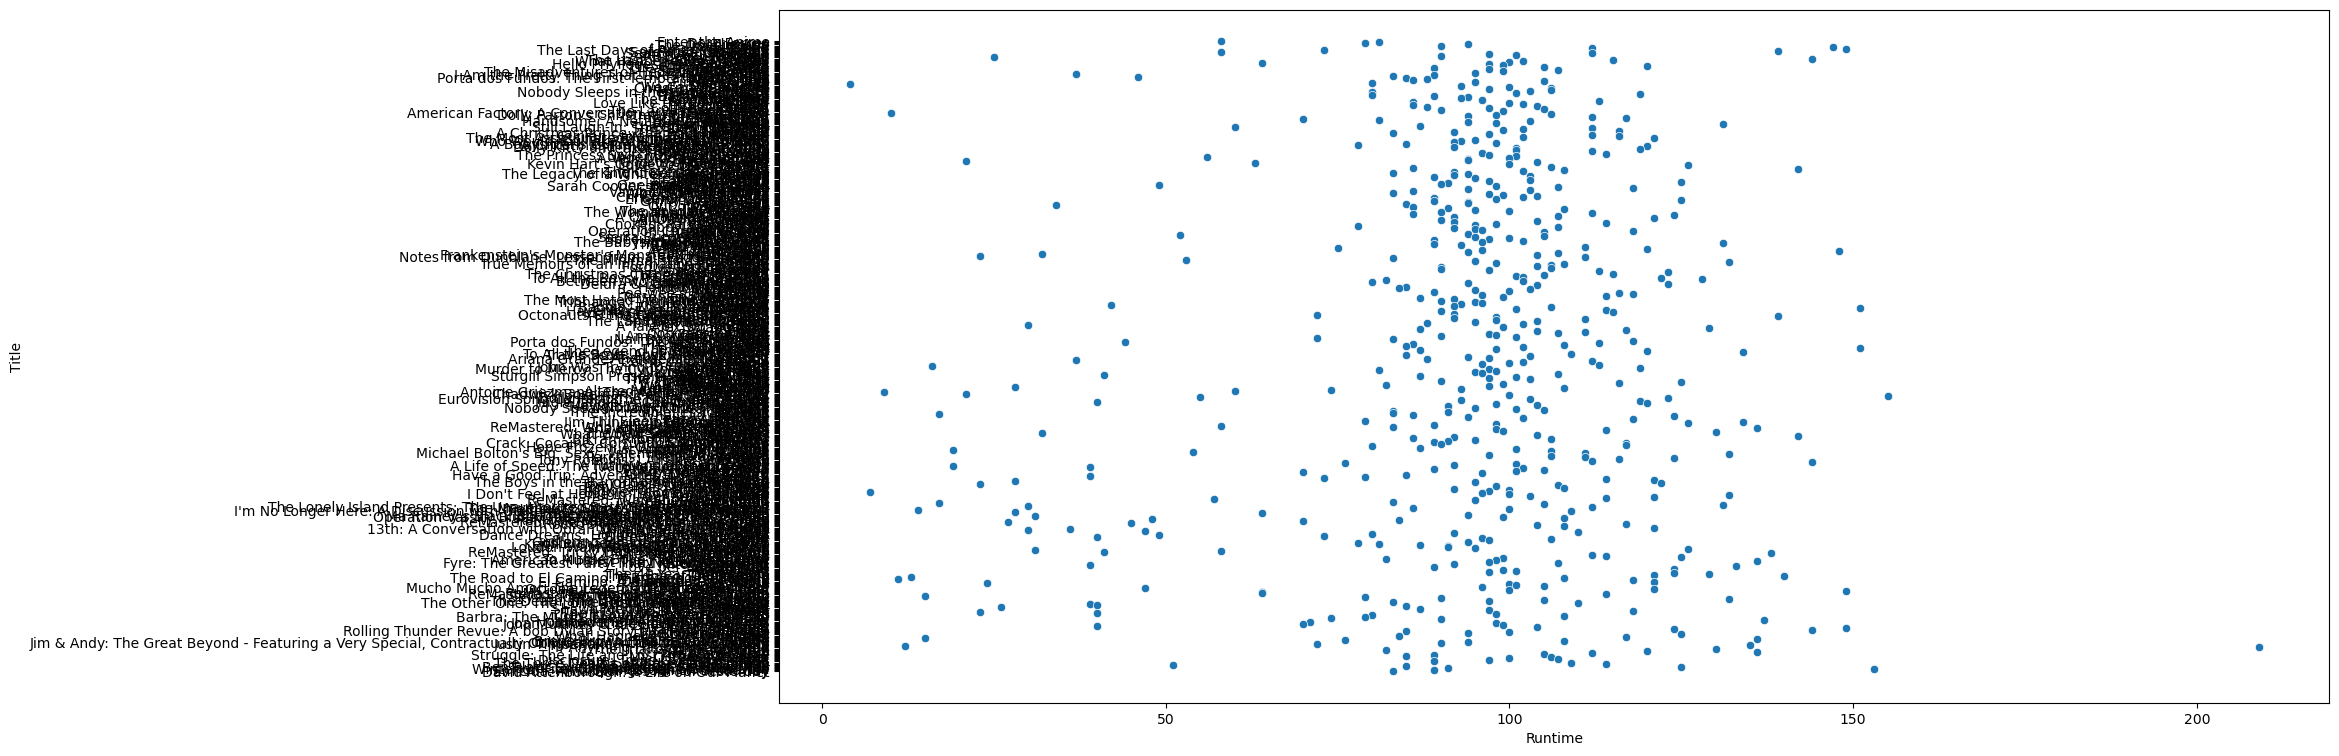

In [150]:
plt.figure(figsize=(20,9))
sns.scatterplot(data=df_ntflx,x='Runtime',y='Title')

In [152]:
#df_ntflx.plot.scatter(x='Runtime',y='Title')

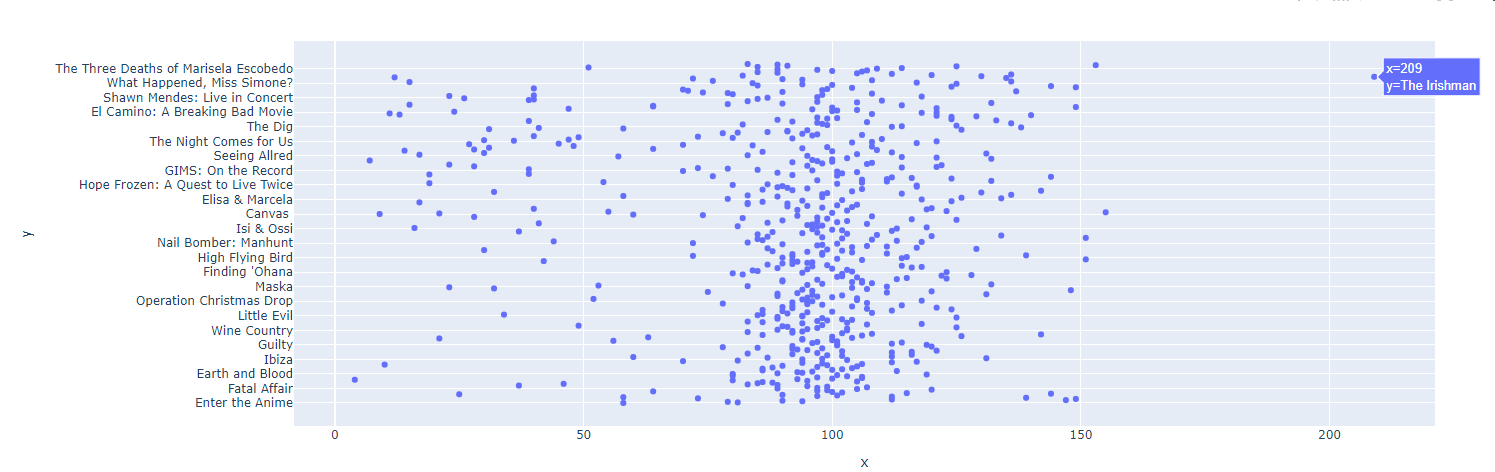